In [13]:
import pandas as pd
from  hmmlearn.hmm import  MultinomialHMM
from __future__ import division
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
traindata = pd.read_csv('train.csv')


In [3]:
traindata.describe()

,Time,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
count,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06,1.535118e+06
mean,7.499097e+05,2.238748e+00,3.133293e+02,3.336551e-02,8.974604e-02,4.002494e-02,2.846333e+02,1.121959e-01,1.377607e-01,2.243919e+00,3.626952e-02,2.455065e-02,6.845107e+00,3.297380e+02,6.268951e-01,4.328986e-01,1.002455e+02,8.974604e-02
std,4.329780e+05,4.103912e-01,1.243922e+01,1.795892e-01,9.149957e-01,1.960178e-01,7.949223e+00,3.156075e-01,3.446488e-01,6.312149e+00,1.869601e-01,1.003082e+00,3.939373e+00,4.474176e+00,4.836298e-01,2.301305e-01,1.003082e+01,9.149957e-01
min,0.000000e+00,0.000000e+00,2.830333e+02,0.000000e+00,-2.550066e+00,0.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.211737e+00,1.000000e-02,2.731500e+02,0.000000e+00,9.999997e-02,6.788263e+01,-2.550066e+00
25%,3.747987e+05,1.947852e+00,3.026443e+02,0.000000e+00,-5.709403e-01,0.000000e+00,2.772906e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.451308e-01,3.438636e+00,3.301512e+02,0.000000e+00,1.000000e-01,9.354869e+01,-5.709403e-01
50%,7.497585e+05,2.301164e+00,3.144388e+02,0.000000e+00,1.375469e-01,0.000000e+00,2.843755e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.120029e-02,6.900535e+00,3.302432e+02,1.000000e+00,6.000000e-01,1.001120e+02,1.375469e-01
75%,1.124822e+06,2.624508e+00,3.249014e+02,0.000000e+00,7.714164e-01,0.000000e+00,2.907142e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.859645e-01,1.028763e+01,3.302813e+02,1.000000e+00,6.000000e-01,1.068596e+02,7.714164e-01
max,1.500000e+06,2.700000e+00,3.311366e+02,1.000000e+00,2.073183e+00,1.000000e+00,3.037318e+02,1.000000e+00,1.000000e+00,2.000000e+01,1.000000e+00,3.507157e+00,1.363493e+01,3.303026e+02,1.000000e+00,6.000000e-01,1.350716e+02,2.073183e+00


In [5]:
testdata1 = pd.read_csv('./test/00_test.csv')

In [6]:
testdata1.describe()

,Time,tag00,tag01,tag02,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag15,tag16,tag17,tag18
count,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000,175139.000000
mean,85743.326996,2.178454,313.362606,329.229513,0.028149,0.010237,0.040151,283.960840,0.108993,0.139495,2.179869,0.036257,-0.064479,0.811159,0.632977,0.435868,99.355211,0.010237
std,49424.914076,0.398497,12.584983,1.435353,0.165399,1.006800,0.196314,8.722520,0.311632,0.346463,6.232637,0.186929,0.939109,0.452314,0.481994,0.229075,9.391086,1.006800
min,0.000000,1.167600,289.786285,323.280914,0.000000,-2.164800,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,-2.380993,0.080000,0.000000,0.100000,76.190071,-2.164800
25%,42968.500000,2.005974,302.154633,329.120575,0.000000,-0.488052,0.000000,278.119476,0.000000,0.000000,0.000000,0.000000,-0.704123,0.391508,0.000000,0.100000,92.958771,-0.488052
50%,85733.765625,2.203154,314.550842,329.784332,0.000000,-0.093692,0.000000,282.063080,0.000000,0.000000,0.000000,0.000000,-0.142247,0.824770,1.000000,0.600000,98.577530,-0.093692
75%,128563.500000,2.474296,324.938049,330.026215,0.000000,0.448592,0.000000,287.485901,0.000000,0.000000,0.000000,0.000000,0.617023,1.213979,1.000000,0.600000,106.170235,0.448592
max,171268.000000,2.700000,331.134613,330.107208,1.000000,2.557115,1.000000,308.571167,1.000000,1.000000,20.000000,1.000000,2.106906,1.632239,1.000000,0.600000,121.069061,2.557115


In [7]:
train = traindata.ix[:,1:]


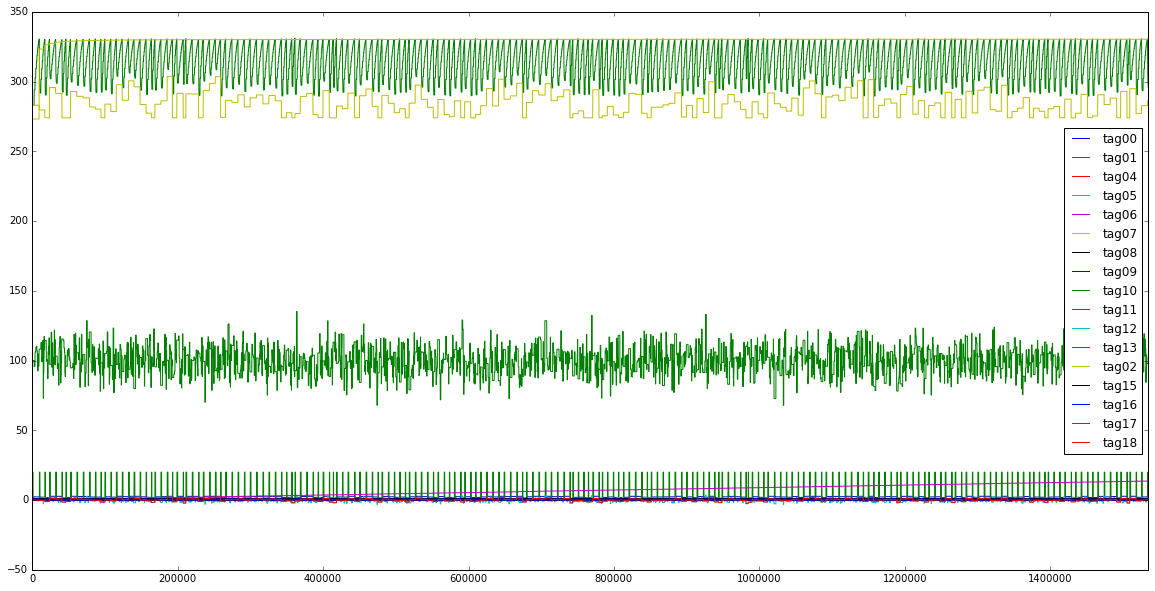

In [38]:
train.plot(figsize = (20,10))

In [8]:
test1 = testdata1.ix[:,1:]

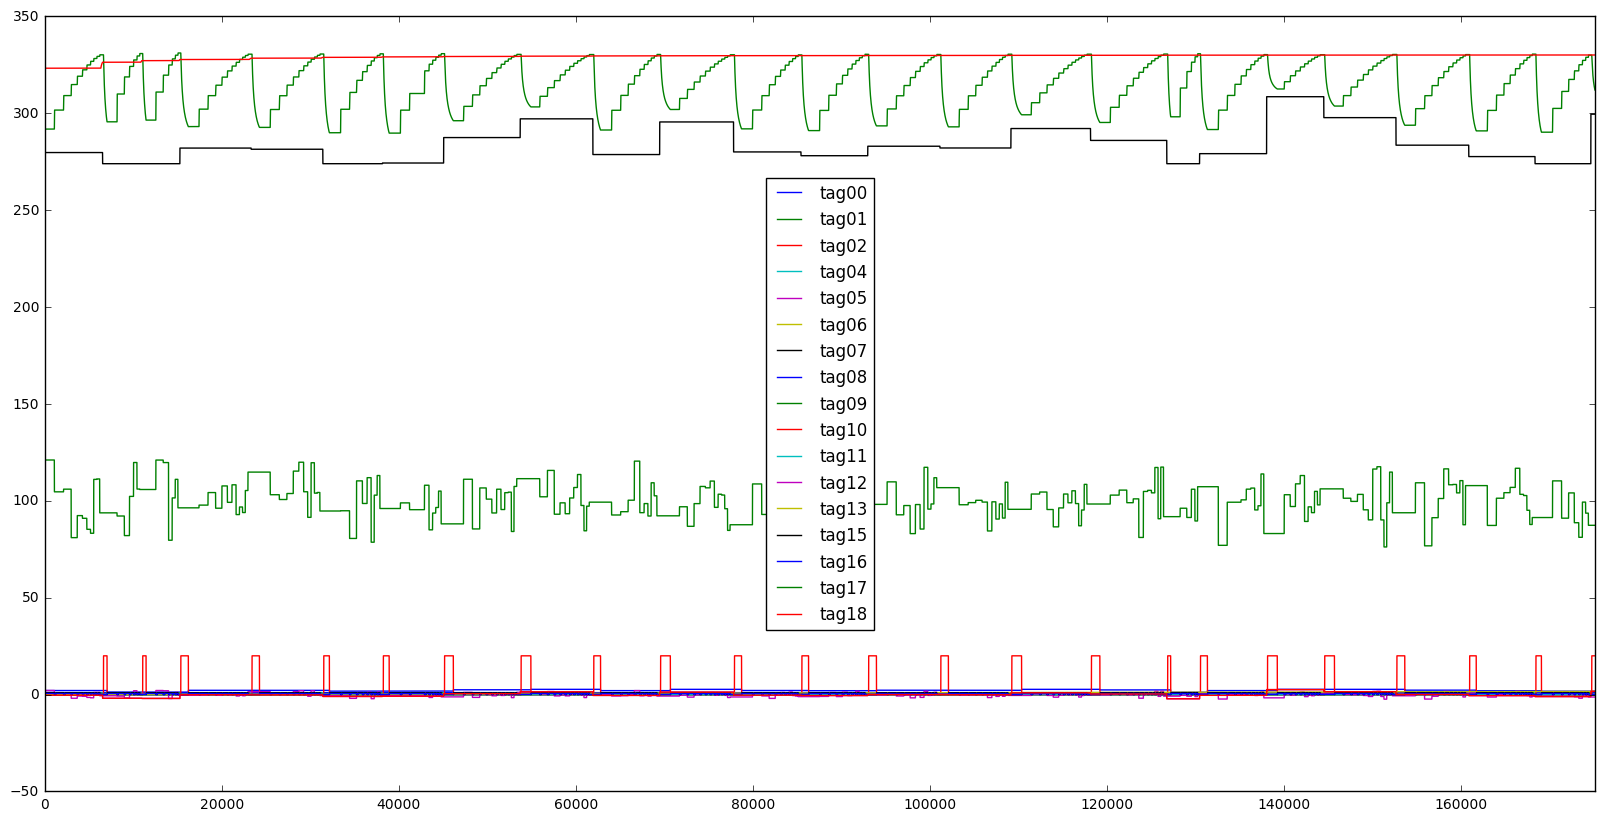

In [30]:
test1.plot( figsize = (20,10))

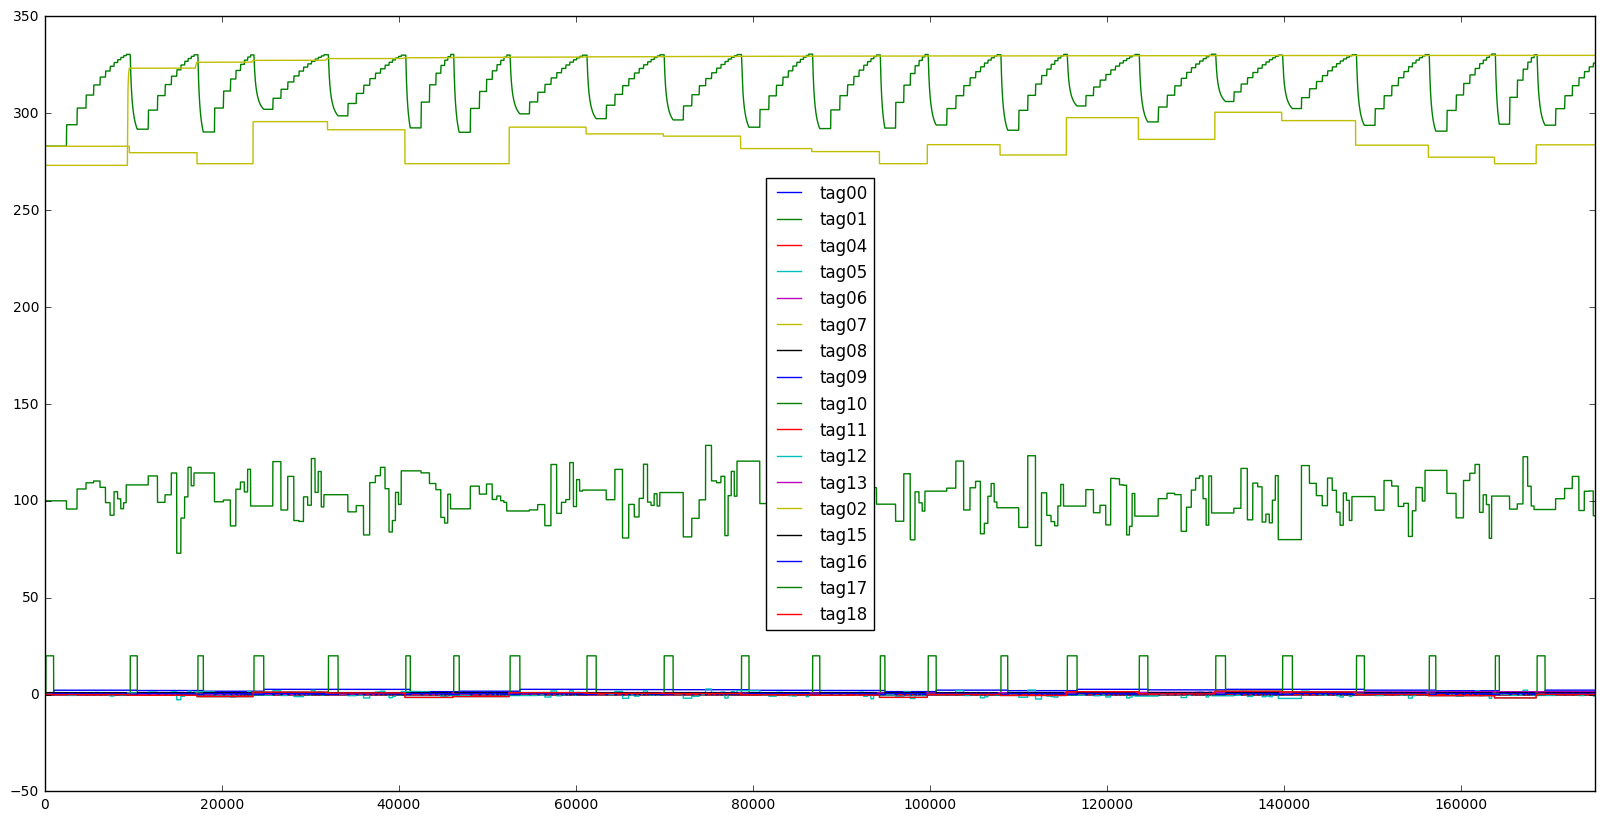

In [32]:
train[:175139].plot( figsize = (20,10))

In [9]:
testdata2 = pd.read_csv('./test/01_test.csv')

In [94]:
testdata2.ix[:,1:].describe()

,tag00,tag01,tag02,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag15,tag16,tag17,tag18
count,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.00000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000,173685.000000
mean,2.285214,313.500267,329.542089,0.029715,0.214397,0.040193,285.368560,0.11617,0.137473,2.323402,0.036065,0.006697,1.019685,0.626865,0.432788,100.066970,0.214397
std,0.315306,12.343065,0.488303,0.169800,0.843307,0.196413,8.049470,0.32043,0.344347,6.408594,0.186453,1.036317,0.452038,0.483639,0.230191,10.363166,0.843307
min,1.478141,290.143677,327.662994,0.000000,-1.543718,0.000000,274.000000,0.00000,0.000000,0.000000,0.000000,-2.532578,0.215703,0.000000,0.100000,74.674217,-1.543718
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.700000,330.759003,330.007019,1.000000,2.495010,1.000000,307.950104,1.00000,1.000000,20.000000,1.000000,2.942168,1.835629,1.000000,0.600000,129.421677,2.495010


In [10]:
test2 = testdata2.ix[:,1:]

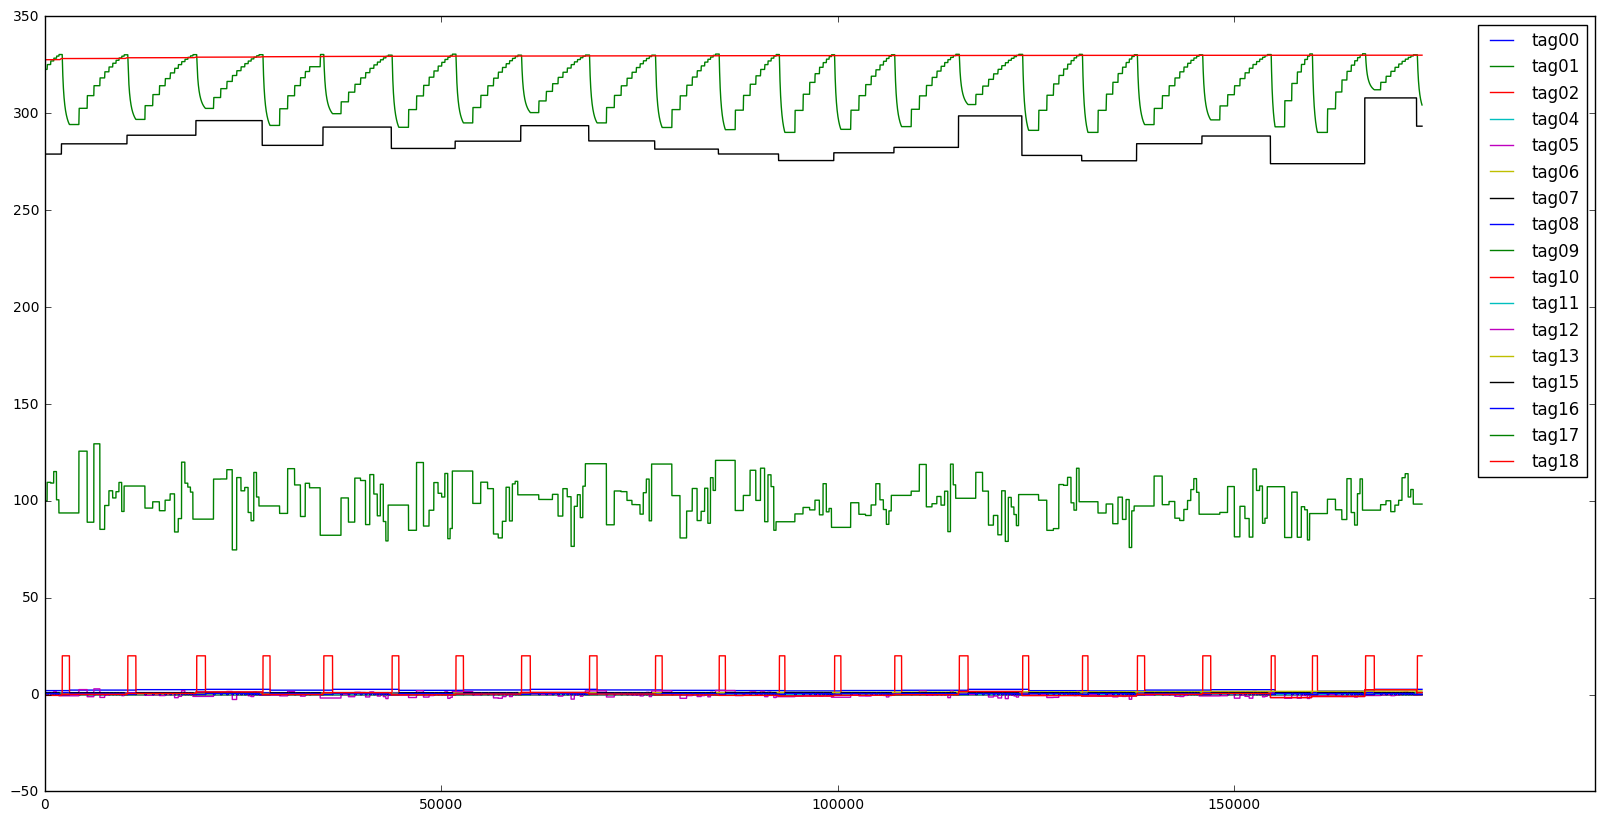

In [98]:
test2.plot( figsize = (20,10))

In [14]:
train[:10]

,tag00,tag01,tag04,tag05,tag06,tag07,tag08,tag09,tag10,tag11,tag12,tag13,tag02,tag15,tag16,tag17,tag18
0,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
1,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
2,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
3,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
4,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
5,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
6,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
7,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
8,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0
9,0.0,283.149994,0.0,0.0,0.0,283.0,0.0,0.0,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,100.0,0.0


In [26]:
trainmodel = GaussianHMM(n_components = 7)
trainmodel.fit(train)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=7, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [51]:
scorelist = []
window = 50

n = len(test1)/window

remain_indexs = len(test1) - n * window
print remain_indexs
#remain_test_data = test1[-remain_indexs:,-1]

0.0


In [31]:
n

3502.78

In [52]:
i =0
for num in range(0,int(n)):
    value = trainmodel.score(test1[i:i+window])
    i+=window
    scorelist.append(value)


In [61]:
print scorelist[:10]
print np.max(scorelist)
print np.min(scorelist)

[-6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699, -6035060090708.1699]
-6.02708950349e+12
-6.12493619201e+12


In [68]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(trainmodel, open(filename, 'wb'))


# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)